In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt


In [2]:
#reading the csv´s
train_labels=pd.read_csv('train_labels_abiUmgM.csv')
train_values=pd.read_csv('train_values.csv')
test_values=pd.read_csv('test_values.csv')
#seeing the heads of the data
train_labels.head()

,row_id,rate_spread
0,0,1.0
1,1,2.0
2,2,3.0
3,3,6.0
4,4,4.0


In [9]:
train_values.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant
0,0,2,1,1,1,139.0,1,261,14,246,...,1,77.0,5949.0,11.642,63192.0,100.000,1556.0,1993.0,2094,True
1,1,2,2,1,1,160.0,3,349,48,311,...,1,42.0,2667.0,37.141,63693.0,75.729,875.0,1163.0,4194,False
2,2,1,2,1,1,168.0,3,385,30,256,...,1,34.0,6393.0,79.635,42883.0,76.948,636.0,1611.0,1119,False
3,3,1,2,1,1,57.0,3,117,30,46,...,1,37.0,7175.0,72.843,63806.0,78.836,1587.0,2172.0,1119,False
4,4,2,1,2,1,25.0,3,95,41,192,...,2,46.0,5041.0,23.188,70908.0,59.579,756.0,1992.0,1593,False


In [10]:
test_values.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant
0,0,1,2,1,1,46.0,3,262,37,83,...,2,50.0,10761.0,43.415,61732.0,100.000,2900.0,3603.0,1119,False
1,1,1,1,3,1,170.0,3,282,11,267,...,1,155.0,2285.0,20.115,50373.0,100.000,539.0,873.0,4216,False
2,2,1,1,1,1,174.0,3,274,12,162,...,1,102.0,7765.0,78.621,75175.0,54.165,1559.0,1712.0,2467,False
3,3,1,1,1,2,116.0,2,254,37,282,...,1,51.0,3387.0,96.208,48677.0,74.476,938.0,784.0,2773,True
4,4,1,1,3,1,108.0,3,194,41,17,...,1,88.0,3106.0,6.370,68070.0,100.000,1119.0,1301.0,3110,False


In [18]:
print(train_labels.dtypes,'\n''\n',train_values.dtypes,'\n''\n',test_values.dtypes,'\n''\n')
#se miran los tipos de datos

row_id           int64
rate_spread    float64
dtype: object 

 row_id                              int64
loan_type                           int64
property_type                       int64
loan_purpose                        int64
occupancy                           int64
loan_amount                       float64
preapproval                         int64
msa_md                              int64
state_code                          int64
county_code                         int64
applicant_ethnicity                 int64
applicant_race                      int64
applicant_sex                       int64
applicant_income                  float64
population                        float64
minority_population_pct           float64
ffiecmedian_family_income         float64
tract_to_msa_md_income_pct        float64
number_of_owner-occupied_units    float64
number_of_1_to_4_family_units     float64
lender                              int64
co_applicant                         bool
dtype: object

In [17]:
train_values.dtypes==test_values.dtypes
#se verifica que ambos archivos tengan los mismos tipos de datos

row_id                            True
loan_type                         True
property_type                     True
loan_purpose                      True
occupancy                         True
loan_amount                       True
preapproval                       True
msa_md                            True
state_code                        True
county_code                       True
applicant_ethnicity               True
applicant_race                    True
applicant_sex                     True
applicant_income                  True
population                        True
minority_population_pct           True
ffiecmedian_family_income         True
tract_to_msa_md_income_pct        True
number_of_owner-occupied_units    True
number_of_1_to_4_family_units     True
lender                            True
co_applicant                      True
dtype: bool

In [19]:
print(train_labels.info(),'\n''\n',train_values.info(),'\n''\n',test_values.info(),'\n''\n')
#se chequea la información general de los 3 archivos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
row_id         200000 non-null int64
rate_spread    200000 non-null float64
dtypes: float64(1), int64(1)
memory usage: 3.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 22 columns):
row_id                            200000 non-null int64
loan_type                         200000 non-null int64
property_type                     200000 non-null int64
loan_purpose                      200000 non-null int64
occupancy                         200000 non-null int64
loan_amount                       200000 non-null float64
preapproval                       200000 non-null int64
msa_md                            200000 non-null int64
state_code                        200000 non-null int64
county_code                       200000 non-null int64
applicant_ethnicity               200000 non-null int64
applicant_race                    2

In [20]:
print(len(train_labels),'\n''\n',len(train_values),'\n''\n',len(test_values),'\n''\n')
#se chequea la cantidad de filas en ambos registros

200000 

 200000 

 200000 




In [9]:
train_labels.describe()
#estádisticas básicas del archivo de etiquetas de entrenamiento 
#aquí empiezan las preguntas de edx.org

,row_id,rate_spread
count,200000.000000,200000.000000
mean,99999.500000,1.979110
std,57735.171256,1.656809
min,0.000000,1.000000
25%,49999.750000,1.000000
50%,99999.500000,1.000000
75%,149999.250000,2.000000
max,199999.000000,99.000000


In [11]:
np.median(train_labels['rate_spread'])

1.0

1.0     115091
2.0      43464
3.0      13663
4.0       8292
6.0       7854
5.0       6353
8.0       2611
7.0       2455
9.0         77
11.0        41
10.0        41
14.0        20
12.0        16
13.0         6
99.0         3
15.0         2
16.0         2
32.0         2
19.0         2
21.0         1
39.0         1
17.0         1
18.0         1
24.0         1
Name: rate_spread, dtype: int64


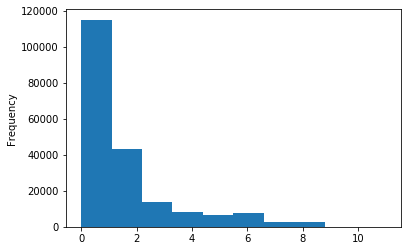

In [47]:
print(train_labels['rate_spread'].value_counts())
train_labels['rate_spread'].plot.hist(bins=10,range=(0,11))
plt.show()

In [73]:
train_values['rate_spread']=train_labels['rate_spread']


In [5]:
print(train_values['applicant_ethnicity'].value_counts())

2    148018
1     34817
3     16451
4       714
Name: applicant_ethnicity, dtype: int64


In [6]:
print( train_values.groupby(['applicant_ethnicity'])[['rate_spread']].mean())
print( train_values.groupby(['applicant_sex'])[['rate_spread']].mean())

                     rate_spread
applicant_ethnicity             
1                       1.749634
2                       1.920064
3                       3.006747
4                       1.732493
               rate_spread
applicant_sex             
1                 1.964712
2                 1.976469
3                 2.238966
4                 2.012474


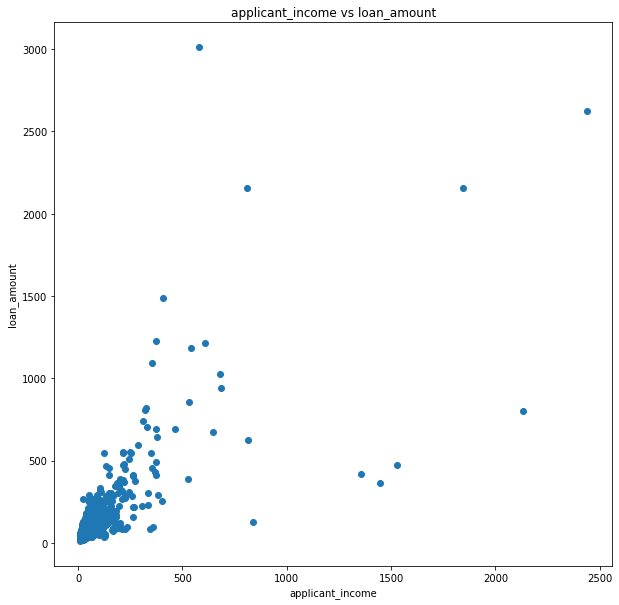

In [83]:
x=train_values[train_values['state_code']==43]['applicant_income']
y=train_values[train_values['state_code']==43]['loan_amount']
plt.figure(figsize=(10,10))
plt.scatter(x,y)
plt.xlabel('applicant_income')
plt.ylabel('loan_amount')
plt.title('applicant_income vs loan_amount')
plt.show()

In [82]:
print( train_values.groupby([train_values['state_code']==43])[['applicant_income','loan_amount']].mean())

            applicant_income  loan_amount
state_code                               
False              73.569681   142.620245
True               83.513072   134.522788


In [15]:
print( train_values.groupby(['state_code'])[['applicant_income','loan_amount']].mean())
x=train_values.groupby(['state_code'])[['applicant_income','loan_amount']].mean()

            applicant_income  loan_amount
state_code                               
-1                 92.069486    86.057549
 0                 61.819149   114.738402
 1                 66.122220   105.504142
 2                 74.398690   103.035978
 3                 71.173398   188.286109
 5                 97.557377   135.518519
 6                 91.600000   214.278457
 7                 88.061127   210.880153
 8                 83.325773   120.389662
 9                 93.567048   212.357113
 10                73.426206   176.778647
 11                64.888432   127.249665
 12                70.215763   124.657806
 13                65.530289    91.290687
 14                70.578457   101.356443
 15                65.270440   137.464494
 16                69.691633    97.100669
 17               183.446927   342.294416
 18                64.965250    98.433887
 19                90.329208   212.894044
 20                68.188948   139.811475
 21                61.932584    88

applicant_income    float64
loan_amount         float64
state_code          float64
dtype: object


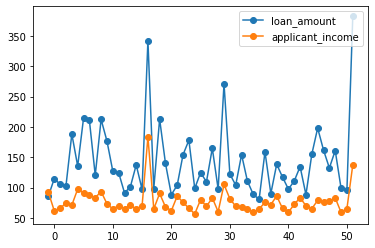

In [36]:
print(x.dtypes)
x['state_code']=np.arange(start = -1.0, stop = 52.0, step = 1)
plt.plot(x.state_code,x.loan_amount,marker='o')
plt.plot(x.state_code,x.applicant_income,marker='o')
plt.legend(['loan_amount','applicant_income'])
plt.show()

In [96]:
#Limiting just to state 48 and ignoring where county is missing (missing value being -1), which of the following statements is true?
dfaux=train_values[train_values['state_code']==48][['county_code','rate_spread']]
print('average rate spread across counties')
print('Min: ',dfaux.groupby('county_code').rate_spread.mean().min(),'Max= ',dfaux.groupby('county_code').rate_spread.mean().max())

average rate spread across counties
Min:  1.0 Max=  7.0


In [107]:
dfaux=train_values[(train_values.state_code.isin([2,3]))&(train_values.loan_type.isin([1,2,3]))][['state_code','loan_type','rate_spread']]
print(dfaux.groupby(['state_code','loan_type']).rate_spread.mean())
print(dfaux.groupby(['state_code']).rate_spread.mean())
print(dfaux.rate_spread.mean())

state_code  loan_type
2           1            3.384134
            2            1.458891
            3            1.066667
3           1            2.766253
            2            1.328321
            3            1.047619
Name: rate_spread, dtype: float64
state_code
2    2.765242
3    1.717116
Name: rate_spread, dtype: float64
2.2353530295443167
